In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv
/kaggle/input/global-weather-repository/state.db


In [2]:
import random

seed = 845
random.seed(seed)
np.random.seed(seed)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV, ElasticNetCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.ensemble import HistGradientBoostingRegressor,ExtraTreesRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
df.head(10)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1715849100,2024-05-16 04:45,26.0,78.8,Partly cloudy,5.6,9.0,90,E,1013.0,29.91,0.02,0.00,84,25,28.2,82.8,10.0,6.0,1.0,15.7,25.3,220.3,29.0,0.2,0.2,1.2,4.5,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1715849100,2024-05-16 05:45,8.0,46.4,Clear,2.2,3.6,10,N,1014.0,29.94,0.00,0.00,93,0,7.1,44.9,10.0,6.0,1.0,6.5,10.5,270.4,7.7,8.3,1.3,4.0,5.3,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55
7,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45,19.0,66.2,Partly cloudy,4.3,6.8,140,SE,1017.0,30.03,0.13,0.01,40,25,19.0,66.2,10.0,6.0,4.0,6.2,9.9,186.9,103.0,1.0,0.3,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,1715849100,2024-05-16 18:45,9.0,48.2,Clear,2.5,4.0,100,E,1027.0,30.33,0.00,0.00,87,0,9.1,48.5,10.0,6.0,1.0,3.3,5.3,277.0,26.8,15.1,1.0,3.7,5.4,1,1,06:52 AM,05:07 PM,01:31 PM,No moonset,Waxing Gibbous,55
9,Austria,Vienna,48.20,16.37,Europe/Vienna,1715849100,2024-05-16 10:45,16.0,60.8,Partly cloudy,12.5,20.2,110,ESE,1013.0,29.91,0.00,0.00,63,75,16.0,60.8,10.0,6.0,5.0,19.8,31.9,220.3,68.7,5.1,4.1,3.7,4.4,1,1,05:14 AM,08:29 PM,01:00 PM,02:42 AM,Waxing Gibbous,55


In [5]:
df.describe(include='all')

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,27562,27562,27562.000000,27562.000000,27562,2.756200e+04,27562,27562.000000,27562.000000,27562,27562.000000,27562.000000,27562.000000,27562,27562.00000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562.000000,27562,27562,27562,27562,27562,27562.000000
unique,210,248,NaN,NaN,190,NaN,4045,NaN,NaN,30,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317,407,1441,1441,8,NaN
top,Bulgaria,Kabul,NaN,NaN,Asia/Bangkok,NaN,2024-07-27 14:30,NaN,NaN,Partly cloudy,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05:56 AM,06:28 PM,No moonrise,No moonset,Waxing Gibbous,NaN
freq,316,142,NaN,NaN,515,NaN,43,NaN,NaN,9613,NaN,NaN,NaN,2386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379,286,974,772,6414,NaN
mean,NaN,NaN,19.134588,21.959257,NaN,1.721968e+09,NaN,26.026468,78.849303,NaN,8.652507,13.929015,176.670670,NaN,1012.28884,29.892179,0.162058,0.006187,60.477396,38.554931,27.656113,81.774338,9.778485,5.802228,5.479065,12.826696,20.645236,458.067699,65.768634,9.297926,6.762883,17.299316,32.550997,1.410239,1.909549,NaN,NaN,NaN,NaN,NaN,48.529279
std,NaN,NaN,24.488189,65.846762,NaN,3.616422e+06,NaN,7.083048,12.749566,NaN,12.276793,19.757924,100.528297,NaN,6.20536,0.182888,0.647866,0.025607,25.171985,32.709026,8.413804,15.143766,2.292270,1.414585,2.618315,13.078203,21.048009,1106.950812,43.863278,21.744176,62.568489,49.963523,78.304481,0.811067,1.957621,NaN,NaN,NaN,NaN,NaN,35.094169
min,NaN,NaN,-41.300000,-175.200000,NaN,1.715849e+09,NaN,-3.700000,25.300000,NaN,2.200000,3.600000,1.000000,NaN,978.00000,28.880000,0.000000,0.000000,2.000000,0.000000,-4.900000,23.100000,0.000000,0.000000,1.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.500000,0.500000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,3.750000,-6.840000,NaN,1.718805e+09,NaN,22.300000,72.125000,NaN,4.300000,6.800000,92.000000,NaN,1009.00000,29.800000,0.000000,0.000000,41.000000,4.000000,24.200000,75.500000,10.000000,6.000000,4.000000,7.500000,12.000000,201.900000,33.600000,0.600000,0.400000,2.600000,4.700000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,13.000000
50%,NaN,NaN,17.250000,23.320000,NaN,1.722083e+09,NaN,27.000000,80.600000,NaN,8.100000,13.000000,175.000000,NaN,1013.00000,29.900000,0.000000,0.000000,65.000000,25.000000,28.200000,82.800000,10.000000,6.000000,6.000000,11.700000,18.800000,253.700000,61.000000,1.850000,1.400000,7.000000,12.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,48.000000
75%,NaN,NaN,40.400000,49.880000,NaN,1.725106e+09,NaN,30.000000,86.000000,NaN,11.900000,19.100000,260.000000,NaN,1016.00000,30.000000,0.040000,0.000000,81.000000,75.000000,33.000000,91.300000,10.000000,6.000000,7.000000,16.600000,26.700000,388.500000,91.600000,6.700000,4.995000,17.193000,30.424750,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,83.000000


In [6]:
df.condition_text.unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet'], dtype=object)

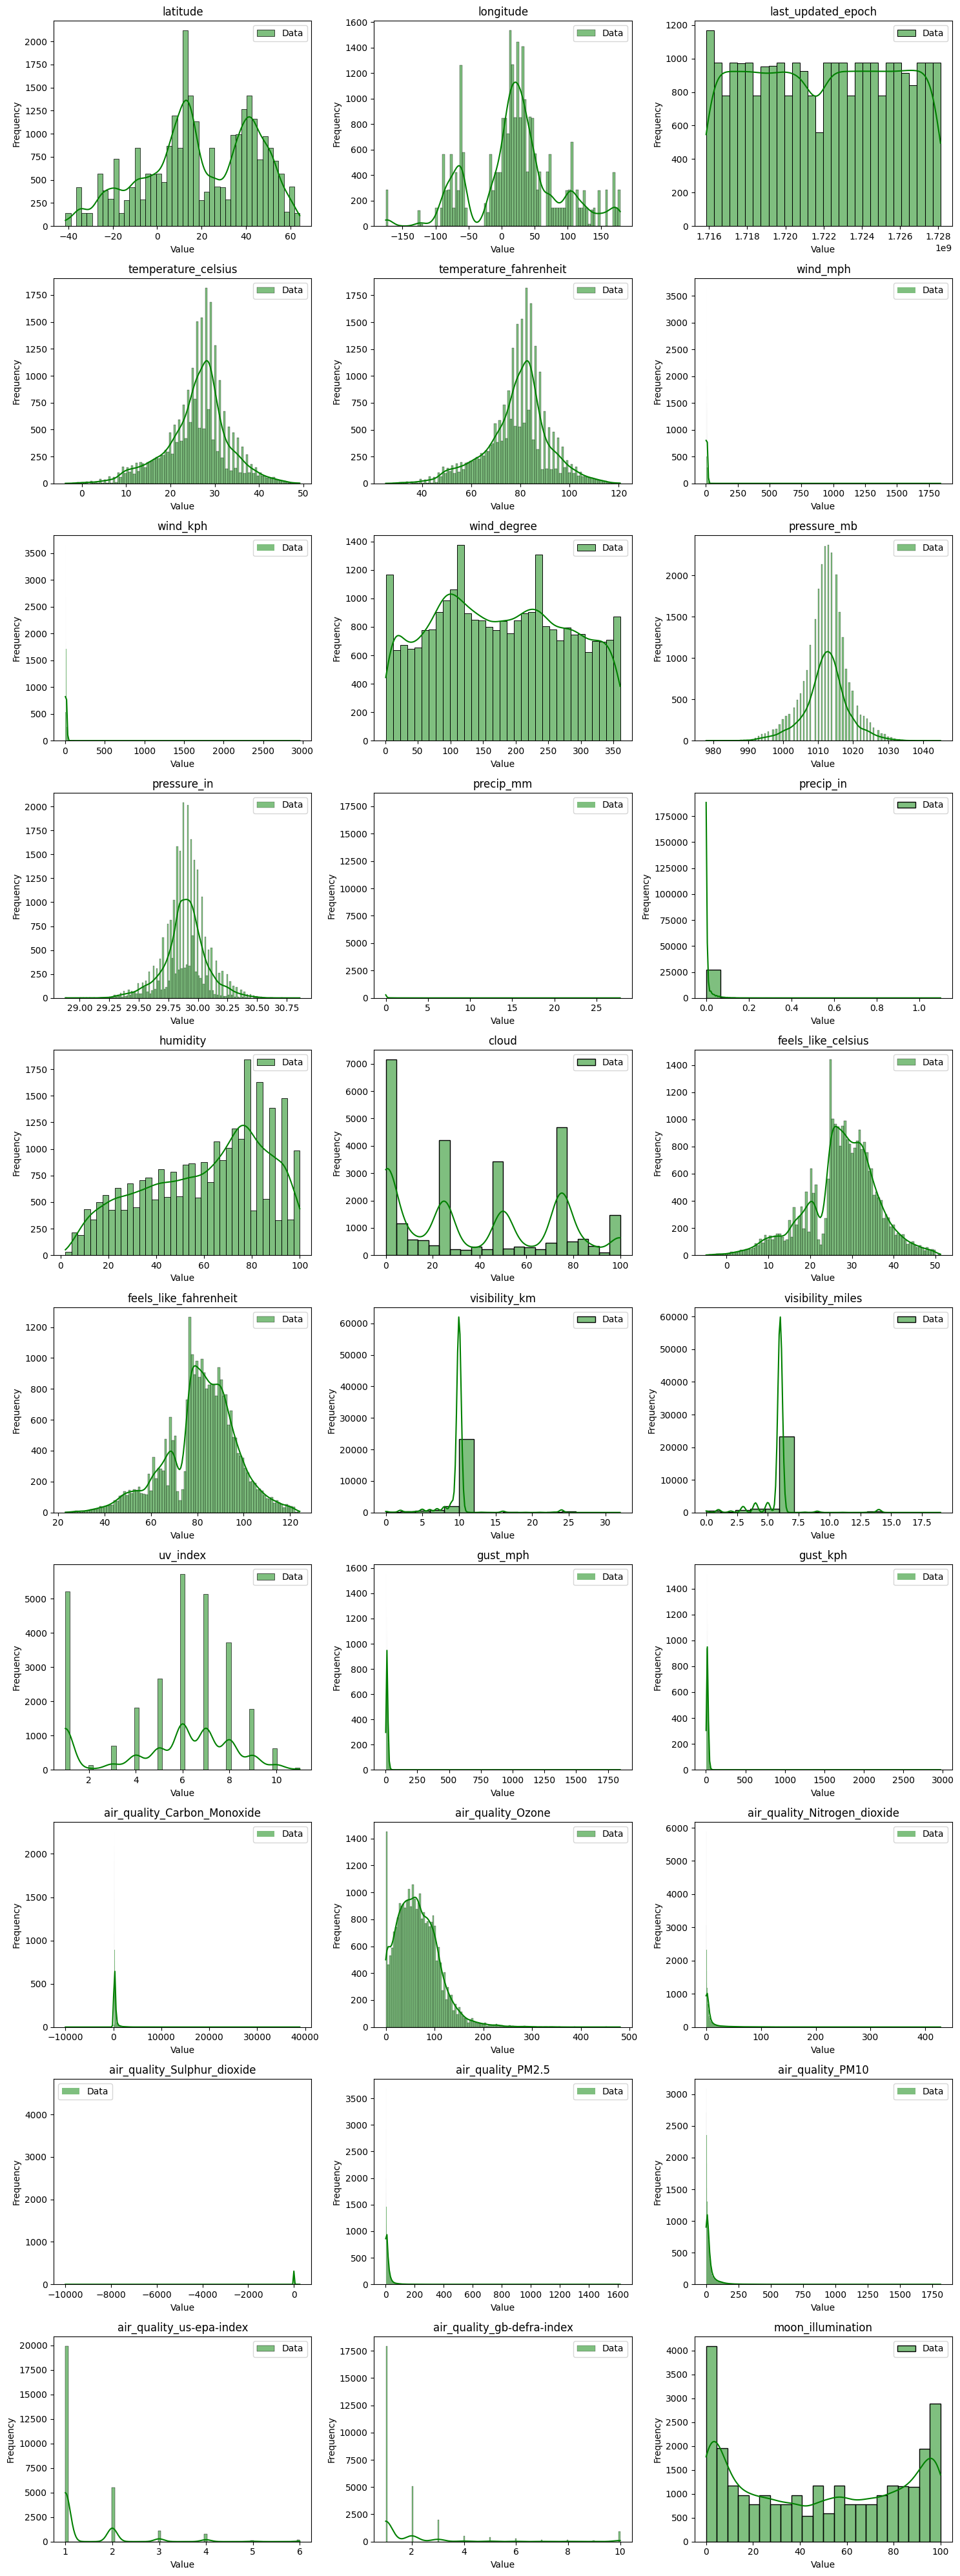

In [7]:
cont_cols=[f for f in df.columns if df[f].dtype in [float,int] and df[f].nunique()>2 and f not in ['condition_text']]

# Calculate the number of rows needed for the subplots
num_rows = (len(cont_cols) + 2) // 3

# Create subplots for each continuous column
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols):
    row = i // 3
    col_pos = i % 3
    # Plot the histograms
    sns.histplot(df[col], ax=axs[row][col_pos], color='green', kde=True, label='Data')
    axs[row][col_pos].set_title(col)
    axs[row][col_pos].set_xlabel('Value')
    axs[row][col_pos].set_ylabel('Frequency')
    axs[row][col_pos].legend()

plt.tight_layout()
plt.show()


In [140]:
def lower_text(text: str):
    return text.lower()

cleaned_df = df.copy()
cleaned_df['condition_text'] = cleaned_df['condition_text'].apply(lower_text)

In [141]:
cleaned_df.condition_text.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet'], dtype=object)

In [142]:
def categorize_weather(description):
    if description in ['clear', 'sunny', 'partly cloudy']:
        return 'Clear/Mostly Clear'
    elif description in ['cloudy', 'overcast']:
        return 'Cloudy/Overcast'
    elif description in ['light drizzle', 'patchy light drizzle', 'light rain', 'light rain shower', 
                         'patchy light rain', 'patchy light rain with thunder', 'patchy rain possible', 
                         'patchy rain nearby']:
        return 'Rain/Drizzle'
    elif description in ['moderate rain', 'moderate rain at times', 'moderate or heavy rain shower', 
                         'moderate or heavy rain with thunder', 'moderate or heavy rain in area with thunder',
                         'heavy rain', 'heavy rain at times', 'torrential rain shower']:
        return 'Moderate/Heavy Rain'
    elif description in ['thundery outbreaks in nearby', 'thundery outbreaks possible', 
                         'patchy light rain in area with thunder', 'moderate or heavy rain with thunder']:
        return 'Thunder/Storm'
    elif description in ['moderate or heavy snow showers', 'light sleet', 'freezing fog']:
        return 'Snow/Ice'
    elif description in ['fog', 'mist']:
        return 'Fog/Mist'
    else:
        return 'Other'

cleaned_df['condition_text_clean'] = cleaned_df['condition_text'].apply(categorize_weather)
cleaned_df['condition_text_clean']

0        Clear/Mostly Clear
1        Clear/Mostly Clear
2        Clear/Mostly Clear
3              Rain/Drizzle
4        Clear/Mostly Clear
                ...        
27557              Fog/Mist
27558    Clear/Mostly Clear
27559    Clear/Mostly Clear
27560    Clear/Mostly Clear
27561    Clear/Mostly Clear
Name: condition_text_clean, Length: 27562, dtype: object

In [143]:
coastal_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 
    'Australia', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize',
    'Benin', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon', 
    'Canada', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 
    'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominica', 'Dominican Republic', 
    'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Fiji Islands', 
    'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece', 'Grenada',
    'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Iceland', 'India', 
    'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
    'Kenya', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 
    'Lithuania', 'Malaysia', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritania', 
    'Mauritius', 'Mexico', 'Micronesia', 'Monaco', 'Montenegro', 'Morocco', 
    'Mozambique', 'Myanmar', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua', 
    'Nigeria', 'North Korea', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 
    'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 
    'Qatar', 'Romania', 'Russia', 'Saint Kitts and Nevis', 'Saint Lucia', 
    'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Saudi Arabia', 
    'Senegal', 'Seychelles Islands', 'Sierra Leone', 'Singapore', 'Slovenia', 
    'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 
    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tanzania', 'Thailand', 
    'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 
    'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 
    'United States of America', 'Uruguay', 'Vanuatu', 'Venezuela', 'Vietnam', 
    'Yemen', 'Zambia', 'Zimbabwe'
]

def is_coastline(country):
    return 1 if country in coastal_countries else 0

cleaned_df['has_coast'] = cleaned_df['country'].apply(is_coastline)
cleaned_df['has_coast'].sum()

21186

In [144]:
cleaned_df.drop(columns=['country', 'location_name', 'wind_direction', 'timezone', 'last_updated_epoch', 'last_updated', 
                         'condition_text', 'sunrise', 'sunset', 'moon_phase', 'moonrise', 'moonset'], inplace=True)

In [145]:
# from sklearn.preprocessing import OneHotEncoder

# categorical_columns = ['condition_text_clean']



# one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(categorical_columns))

# # Concatenate the one-hot encoded dataframe with the original dataframe
# df_encoded = pd.concat([cleaned_df, one_hot_df], axis=1)
df_encoded = cleaned_df.copy()

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
X = df_encoded.drop(columns=['condition_text_clean'])
y = df_encoded['condition_text_clean'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
one_hot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=seed)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

Model performance:
                     precision    recall  f1-score   support

 Clear/Mostly Clear       1.00      1.00      1.00      4117
    Cloudy/Overcast       1.00      1.00      1.00       214
           Fog/Mist       1.00      1.00      1.00       136
Moderate/Heavy Rain       1.00      1.00      1.00       120
       Rain/Drizzle       1.00      1.00      1.00       891
      Thunder/Storm       1.00      1.00      1.00        35

           accuracy                           1.00      5513
          macro avg       1.00      1.00      1.00      5513
       weighted avg       1.00      1.00      1.00      5513



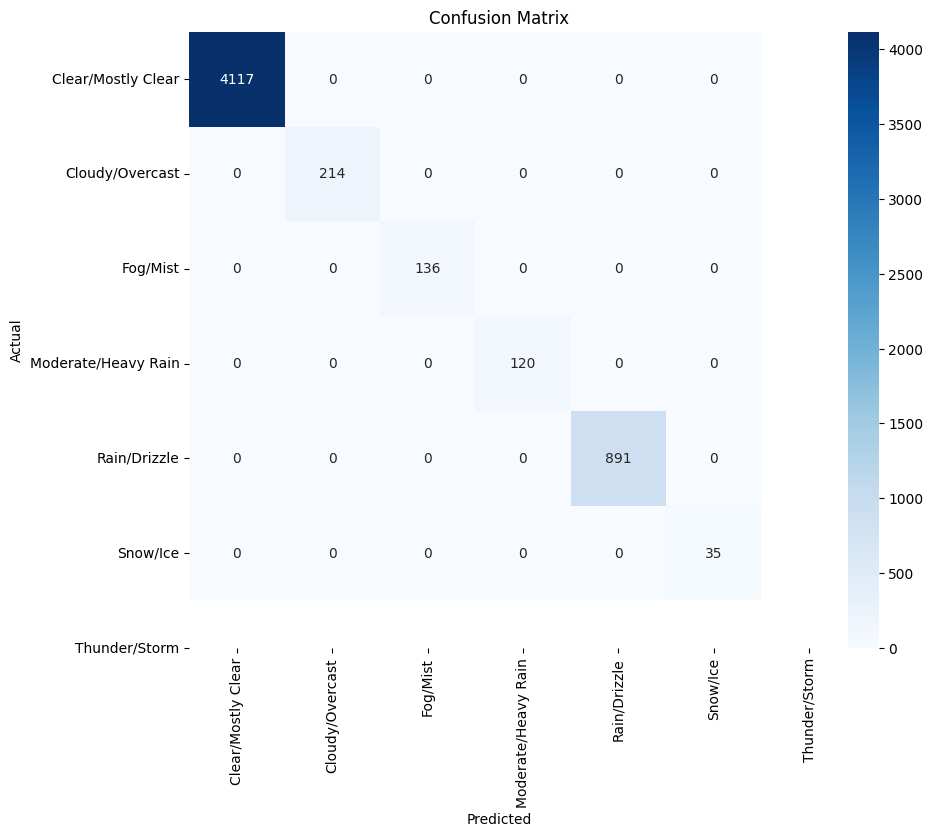

In [167]:
weather_categories = encoder.categories_[0]
y_test_labels = weather_categories[y_test]
y_pred_labels = weather_categories[y_pred]

print("Model performance:")
print(classification_report(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=weather_categories, yticklabels=weather_categories)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# weather_categories